delete les zone 1 et 5

la zone 2 (csv) c'est la zone orange,
la zone 3 (csv) c'est la zone verte,
la zone 4 (csv) c'est la zone bleue,


# Etape 1 : Nettoyage

In [35]:
import pandas as pd




with open('Donné\\1-Raw\\catastrophes_naturelles.csv', 'r') as f:
    lines =  f.readlines()

processed_lines = []
for line in lines:
    line = line.strip()
    if line.startswith('"') and line.endswith('"'):
        line = line[1:-1]
        if line.endswith('""'):
            line = line[:-2] + '"'
            line = line.replace(',""', ',"')
    processed_lines.append(line)

with open('Donné\\2-Interim\\catastrophes_naturelles_without_quotation.csv', 'w') as f:
    for line in processed_lines:
        f.write(line + '\n')

In [36]:
file_path = "Donné\\2-Interim\\catastrophes_naturelles_without_quotation.csv"  
df = pd.read_csv(file_path)

df = df.drop(df.columns[0], axis=1)
df.to_csv('Donné\\3-External\\your_file_modified.csv', index=False)



delete pluie_intensite_max

In [37]:
df_dropped_labels = df.drop(columns=['pluie_intensite_max'])
df_dropped_labels.to_csv('Donné\\4-Processed\\clean_file.csv', index=False)



In [38]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("Donné\\4-Processed\\clean_file.csv")

# Remove rows where 'quartier' is 'Zone 1' or 'Zone 5'
df_filtre = df[~df['quartier'].isin(['Zone 1', 'Zone 5'])]

# Save the cleaned DataFrame to a new file (or overwrite the old one)
df_filtre.to_csv("Donné\\4-Processed\\clean_file.csv", index=False)


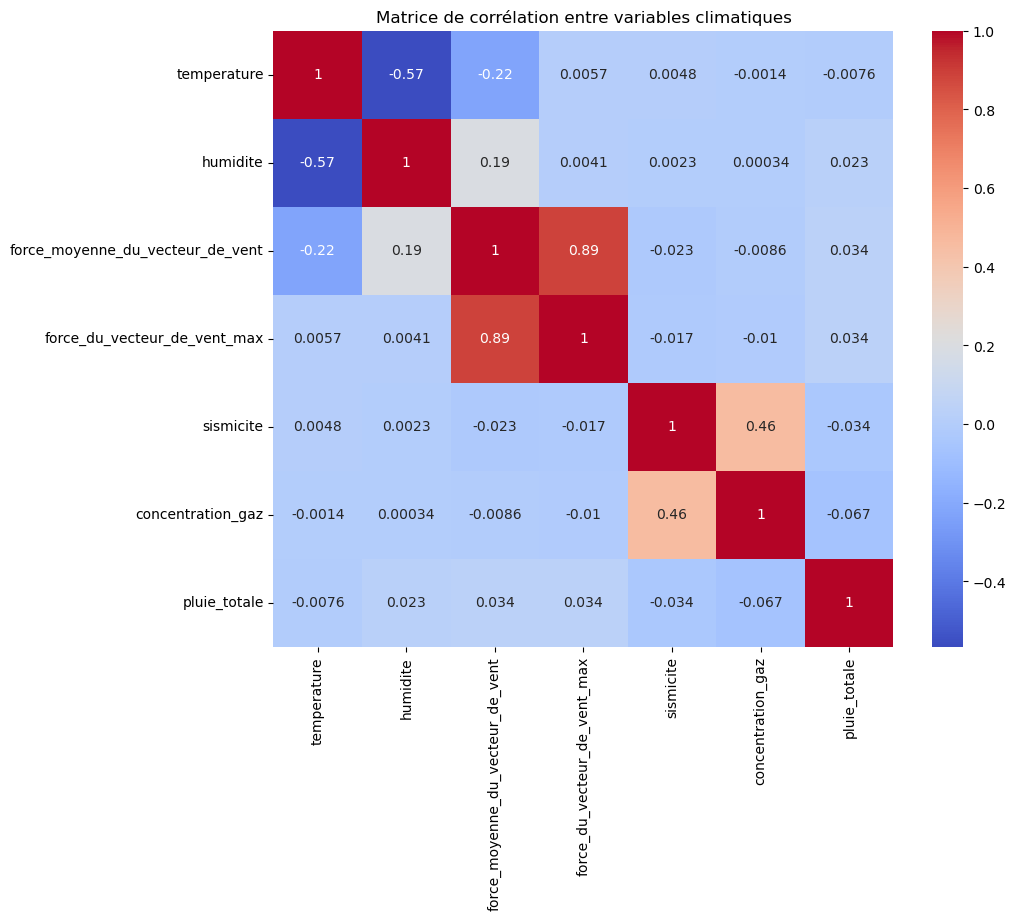

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Donné\\4-Processed\\clean_file.csv")


corr = df.drop(columns=['date', 'quartier', 'catastrophe']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation entre variables climatiques")
plt.show()


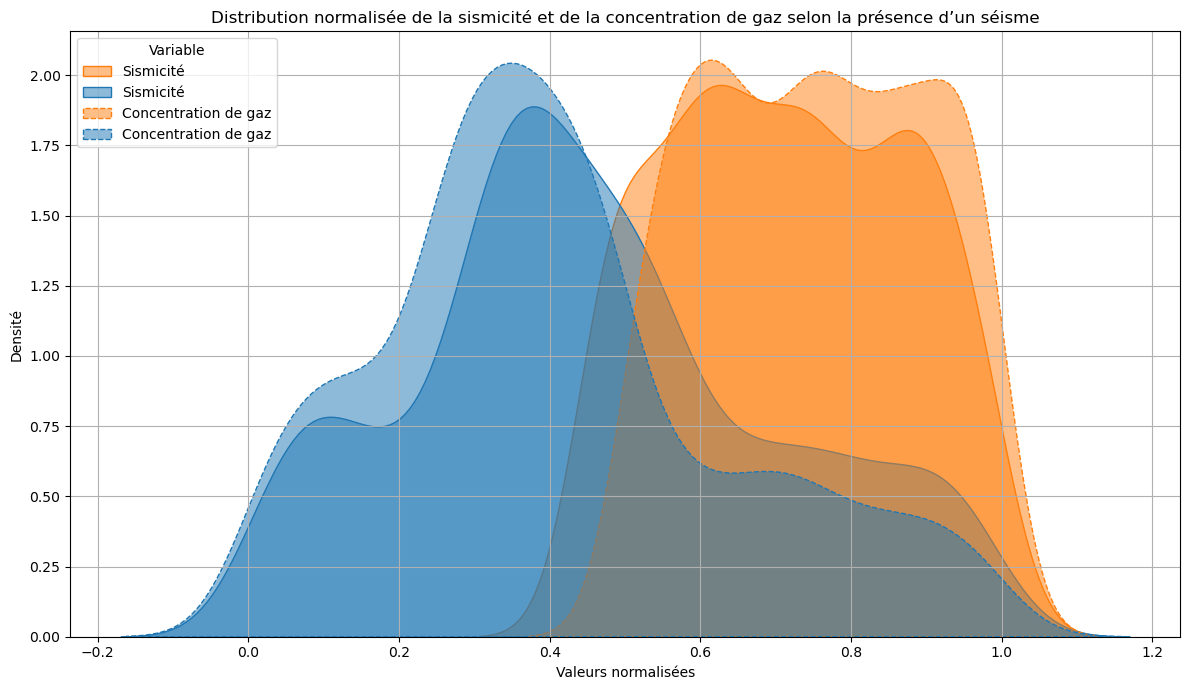

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from sklearn.preprocessing import MinMaxScaler

# Conversion des chaînes en listes
df['catastrophe'] = df['catastrophe'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and x != 'aucun' else ([] if x == 'aucun' else x)
)

# Indiquer la présence de séisme
df['seisme'] = df['catastrophe'].apply(lambda x: 'seisme' in x)

# Normaliser les colonnes 'sismicite' et 'concentration_gaz'
scaler = MinMaxScaler()
df[['sismicite_norm', 'concentration_gaz_norm']] = scaler.fit_transform(df[['sismicite', 'concentration_gaz']])

plt.figure(figsize=(12, 7))

# KDE plot pour sismicite normalisée
sns.kdeplot(data=df, x="sismicite_norm", hue="seisme", fill=True, common_norm=False, alpha=0.5, label="Sismicité")

# KDE plot pour concentration de gaz normalisée
sns.kdeplot(data=df, x="concentration_gaz_norm", hue="seisme", fill=True, common_norm=False, alpha=0.5, linestyle="--", label="Concentration de gaz")

plt.title("Distribution normalisée de la sismicité et de la concentration de gaz selon la présence d’un séisme")
plt.xlabel("Valeurs normalisées")
plt.ylabel("Densité")
plt.legend(title="Variable")
plt.grid(True)
plt.tight_layout()
plt.show()


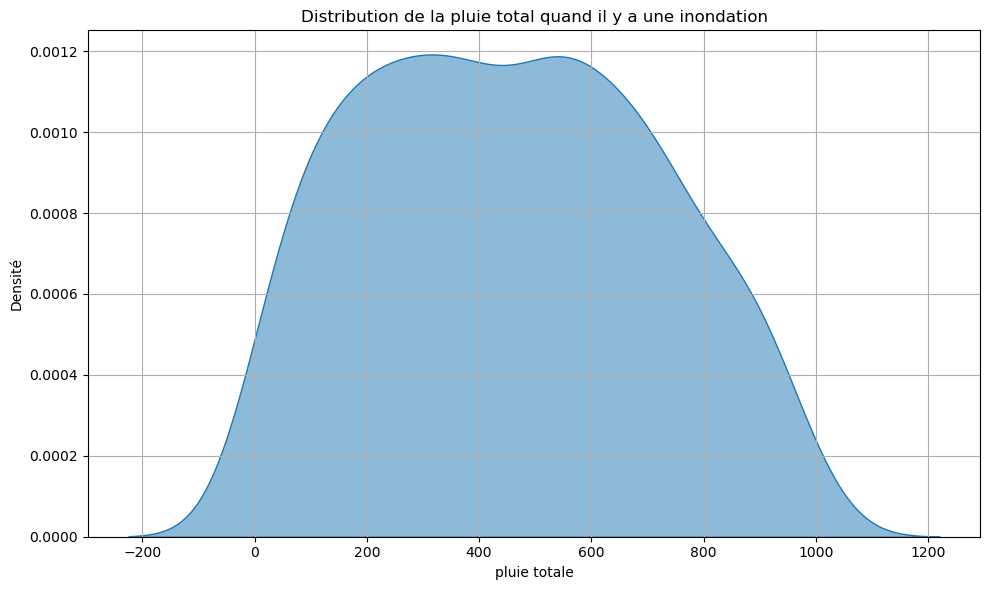

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

# Exemple de données

# Conversion des chaînes en listes
df['catastrophe'] = df['catastrophe'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x != 'aucun' else ([] if x == 'aucun' else x))

# Indiquer la présence de séisme
df['inondation'] = df['catastrophe'].apply(lambda x: 'seisme' in x)

# Filtrer uniquement les lignes où seisme == True
df_seisme = df[df['inondation']]

# Tracer le density plot uniquement pour les séismes
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_seisme, x="pluie_totale", fill=True, alpha=0.5)
plt.title("Distribution de la pluie total quand il y a une inondation")
plt.xlabel("pluie totale")
plt.ylabel("Densité")
plt.grid(True)
plt.tight_layout()
plt.show()
